In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from numpy.random import randn, seed, standard_normal
from Utils.NormalityTests import *

In [2]:
seed(1)
randData_normal = standard_normal(10000)

In [3]:
dataPth = ["/home/alex/PycharmProjects/ML4AT/data/crypto/Token Data/Bitfinex/BTCUSD_5m_2021-06-06 00:00:00.pkl",
           "/home/alex/PycharmProjects/ML4AT/data/crypto/Token Data/Bitfinex/ETHUSD_5m_2021-06-06 00:00:00.pkl"]

In [4]:
data = pd.read_pickle(dataPth[1])
data.head()

,open,high,low,close,volume,averageOHLC
timestamp,,,,,,
2021-06-06 00:00:00,2628.2,2635.059487,2619.5,2620.500000,44.636621,2625.814872
2021-06-06 00:05:00,2619.9,2627.700000,2619.5,2621.276267,8.714203,2622.094067
2021-06-06 00:10:00,2620.3,2621.800000,2615.2,2615.200000,11.109171,2618.125000
2021-06-06 00:15:00,2615.2,2631.225743,2615.2,2625.900000,13.871272,2621.881436
2021-06-06 00:20:00,2625.0,2625.900000,2620.1,2621.700000,27.220626,2623.175000


In [5]:
returns = data["averageOHLC"].pct_change().dropna()

In [6]:
returns.describe()

count    325.000000
mean       0.000187
std        0.001845
min       -0.006455
25%       -0.000924
50%        0.000119
75%        0.001272
max        0.008272
Name: averageOHLC, dtype: float64

<AxesSubplot:xlabel='timestamp'>

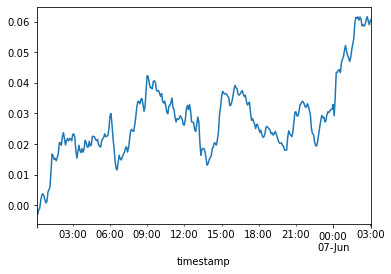

In [7]:
returns.cumsum().plot()

# Normality tests

/home/alex/anaconda3/envs/zr39/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


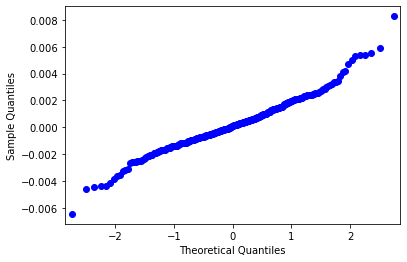

In [8]:
qqplot_wrapper(returns)

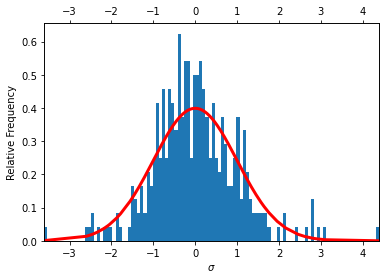

In [9]:
histogram_data_vs_norm_wrapper(returns)

In [10]:
norm_tests_list = [anderson_wrapper, shapiro_wrapper, dogostinos_wrapper, anderson_wrapper, kurtosistest_wrapper, skewtest_wrapper]
res = []
for norm_test in norm_tests_list:
    res.append(norm_test(returns))
res

15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.778, data does not look normal (reject H0)
2.500: 0.907, data does not look normal (reject H0)
1.000: 1.079, data does not look normal (reject H0)
Statistics=0.978, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=22.789, p=0.000
Sample does not look Gaussian (reject H0)
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.778, data does not look normal (reject H0)
2.500: 0.907, data does not look normal (reject H0)
1.000: 1.079, data does not look normal (reject H0)
Kurtosis of the population from which the sample was drawn is NOT of the normal distribution (reject H0)
Skewness of the population that the sample was drawn from is NOT the same as that of a corresponding normal distribution. (reject H0)
Skew value: 0.35782731692808345; threshold: 0.2
More weight in the left tail of the distribution


[False, False, False, False, False, False]

Returns don't appear normal...

Try other transformations

In [11]:
diff1 = data["averageOHLC"].diff().dropna()
diff1.head()

timestamp
2021-06-06 00:05:00   -3.720805
2021-06-06 00:10:00   -3.969067
2021-06-06 00:15:00    3.756436
2021-06-06 00:20:00    1.293564
2021-06-06 00:25:00    6.603687
Name: averageOHLC, dtype: float64

In [12]:
res = []
for norm_test in norm_tests_list:
    res.append(norm_test(diff1))
res

15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.778, data does not look normal (reject H0)
2.500: 0.907, data does not look normal (reject H0)
1.000: 1.079, data does not look normal (reject H0)
Statistics=0.978, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=23.139, p=0.000
Sample does not look Gaussian (reject H0)
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.778, data does not look normal (reject H0)
2.500: 0.907, data does not look normal (reject H0)
1.000: 1.079, data does not look normal (reject H0)
Kurtosis of the population from which the sample was drawn is NOT of the normal distribution (reject H0)
Skewness of the population that the sample was drawn from is NOT the same as that of a corresponding normal distribution. (reject H0)
Skew value: 0.36127457167618443; threshold: 0.2
More weight in the left tail of the distribution


[False, False, False, False, False, False]

This seems to correct the skew

Using Scikit pipeline

In [13]:
from sklearn.preprocessing import PowerTransformer, KBinsDiscretizer

In [14]:
pt = PowerTransformer()
X = pt.fit_transform(np.array(returns).reshape(-1,1))[:,0]
res = []
for norm_test in norm_tests_list:
    res.append(norm_test(X))
res

15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.778, data does not look normal (reject H0)
2.500: 0.907, data does not look normal (reject H0)
1.000: 1.079, data does not look normal (reject H0)
Statistics=0.983, p=0.001
Sample does not look Gaussian (reject H0)
Statistics=13.944, p=0.001
Sample does not look Gaussian (reject H0)
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.778, data does not look normal (reject H0)
2.500: 0.907, data does not look normal (reject H0)
1.000: 1.079, data does not look normal (reject H0)
Kurtosis of the population from which the sample was drawn is NOT of the normal distribution (reject H0)
Skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution. (fail to reject H0)
Skew value: -0.03753187219006577; threshold: 0.2
Distribution is approximately symmetric


[False, False, False, False, False, True]

<AxesSubplot:>

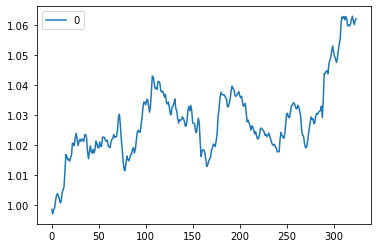

In [57]:
# Reverse the Yeo transform
pd.DataFrame(pt.inverse_transform(X.reshape(-1, 1))).add(1).cumprod().plot()

ACF/PACF

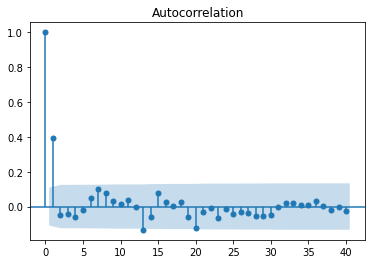

In [75]:
sm.graphics.tsa.plot_acf(returns.values.squeeze(), lags=40)
plt.show()

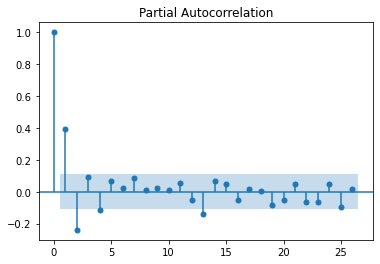

In [77]:
sm.graphics.tsa.plot_pacf(returns.values.squeeze())
plt.show()